### TASK

A Bayesian network (also known as a Bayes network, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG).

They can be used for a wide range of tasks including prediction, anomaly detection, diagnostics, automated insight, reasoning, time series prediction and decision making under uncertainty.

We will write a program to construct a Bayesian Network considering medical data. We will use this program to do dignosis of heart patient dataset.

To implement Bayesian Network we will be using PGMPY(Probabilstic Graphical Models).

###  Dataset acknowledgements

We will be using UCI Heart Disease Data Set : Processed Cleveland Data. 

The UCI Machine Learning Repository is a collection of databases, domain theories, and data generators that are used by the machine learning community.

The dataset consists of 303 individuals data. There are 14 columns in the dataset, which are described below. The last attribute is the predicted attribute.

### Description of Dataset Columns:

1. Age: The age of the individual.It is the most important risk factor in developing cardiovascular diseases.The risk of stroke doubles every decade after age 55.


2. Sex: The gender of the individual.Men are at greater risk of heart disease than pre-menopausal women.Format for same:
    1 = male
    0 = female


3. Chest-pain type: The type of chest-pain experienced by the individual.Angina is chest pain or discomfort caused when your heart muscle doesn’t get enough oxygen-rich blood.Format :
    1 = typical angina
    2 = atypical angina
    3 = non — anginal pain
    4 = asymptotic
    
    
4. Resting Blood Pressure: The resting blood pressure value of an individual in mmHg (unit).Over time, high blood pressure can damage arteries that feed your heart.


5. Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)
A high level of low-density lipoprotein (LDL) cholesterol also called the bad cholesterol is most likely to narrow arteries. However, a high level of high-density lipoprotein (HDL) cholesterol (the “good” cholesterol) lowers your risk of a heart attack.


6. Fasting Blood Sugar: It compares the fasting blood sugar value of an individual.Not responding to insulin properly causes your body’s blood sugar levels to rise, increasing your risk of a heart attack.
If fasting blood sugar > 120mg/dl then : 1 (true)
else : 0 (false)

7. Resting ECG: Displays resting electrocardiographic results.
0 = normal
1 = having ST-T wave abnormality
2 = left ventricular hyperthrophy


8. Max heart rate achieved: displays the max heart rate achieved by an individual.
It has been shown that an increase in heart rate by 10 beats per minute was associated with an increase in the risk of cardiac death by at least 20%


9. Exercise induced angina: The pain or discomfort associated with angina usually feels tight, gripping or squeezing, and can vary from mild to severe.
1 = yes
0 = no


10. ST depression induced by exercise relative to rest: displays the value which is an integer or float.


11. Peak exercise ST segment :
    1 = upsloping
    2 = flat
    3 = downsloping
    
    
12. Number of major vessels(0–3) colored by flourosopy: Displays the value as integer or float.


13. Thal: Displays the thalassemia:
    3 = normal
    6 = fixed defect
    7 = reversible defect
    
    
14. Diagnosis of heart disease: Displays whether the individual is suffering from heart disease or not :
It is integer valued from 0 (no presence) to 4. Presence (values 1,2,3,4) from absence (value 0).

#### Requirements 

- python 3.6 or higher
- pandas
- pgmpy
networkX
scipy
numpy
pytorch

### PGMPY:Probabilistic Graphical Models 

Probabilistic Graphical Models(PGM) are a very solid way of representing joint probability distributions on a set of random variables. It allows users to do inferences in a computationally efficient way.We can calculate the joint probability distribution of these variables by combining various parameters taken from the graph.

Mainly, there are two types of Graph models:

Baysian Graph Models :  These models consist of Directed-Cyclic Graph(DAG) and there is always a conditional probability associated with the random variables. These types of models represent a causation between the random variables.

Markov Graph Models :  These models are undirected graphs and represent non causal relationships between the random variables.
pgmpy is a python framework to work with these types of graph models. Several graph models and inference algorithms are implemented in pgmpy. Pgmpy  also allows users to create their own inference algorithm without getting into the details of the source code of it. 

Let’s get started with the implementation part.

#### Installing PGMPY

In [1]:
!pip install pgmpy;

# import warnings filter
from warnings import simplefilter
simplefilter(action='ignore', category = FutureWarning)

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


Make sure to add an exclamation mark, so that this command doesnt run in jupyetr-notebook but externally for your system.

In [2]:
import pandas as pd

We will be importing our dataset directly from UCI Website. Hence we need to import urllib.

In [3]:
from urllib.request import urlopen
#data = pd.read_csv(urlopen("http://bit.do/heart-disease"))

In [4]:
from pgmpy.models import BayesianModel

#### Getting the data

In [5]:
#Or directly getting data from saved file:
    
data = pd.read_csv("cleveland heart data.txt")

data.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


#### Working with column names

As you can see we need to rework here with the column names.For now, let's give the alphabetical letters to these columns

In [6]:
names = "Age,Sex,Angina_(Chest_Pain),Resting_BP,Serum Cholesterol,Fasting_Sugar,Resting_ECG,Max_Heart_Rate,Excercise_Induced_Angina,Exercise_induces_ST,ST_Segment,Vessels,Thalassemia,Heart_Diagnosis"
names = names.split(",")

data = pd.read_csv("cleveland heart data.txt",names=names)
data.head()

,Age,Sex,Angina_(Chest_Pain),Resting_BP,Serum Cholesterol,Fasting_Sugar,Resting_ECG,Max_Heart_Rate,Excercise_Induced_Angina,Exercise_induces_ST,ST_Segment,Vessels,Thalassemia,Heart_Diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Looks Much better! :)

### Analysing The Data

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Lets see the distribution of age in our dataset with Distribution Plot

<Figure size 1440x864 with 0 Axes>

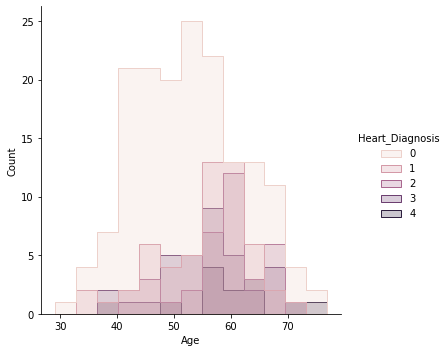

In [8]:
plt.figure(figsize=(20,12))
sns.displot(data,x="Age",hue="Heart_Diagnosis",element = "step");
plt.show()

As we can see most number of paatients lie in the age group above 50.

Histogram plot for distribution of cases on the basis of gender.

<AxesSubplot:xlabel='Age', ylabel='Count'>

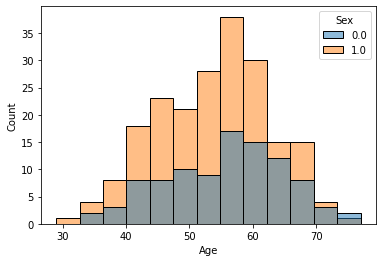

In [9]:
sns.histplot(data,x="Age",hue="Sex")

<AxesSubplot:ylabel='Count'>

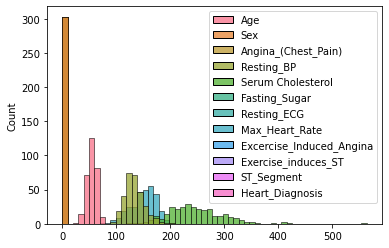

In [10]:
sns.histplot(data=data)

Heatmap helps us visualize matrix-like data in the form of hot and cold spots. The warm colors indicated sections with the most visitor interaction.

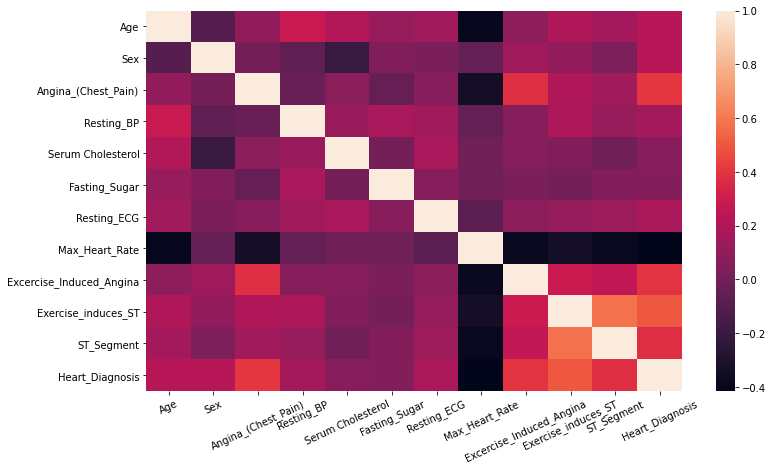

In [11]:
plt.figure(figsize=(12,7));
sns.heatmap(data.corr());

# Rotate x-labels with the help of matplotlib
plt.xticks(rotation=25);

lets see the relationship of heart rate and diagnosis in our result:

<AxesSubplot:xlabel='Max_Heart_Rate', ylabel='Count'>

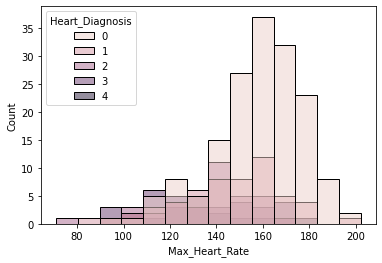

In [12]:
sns.histplot(data,x="Max_Heart_Rate",hue="Heart_Diagnosis")

<Figure size 864x504 with 0 Axes>

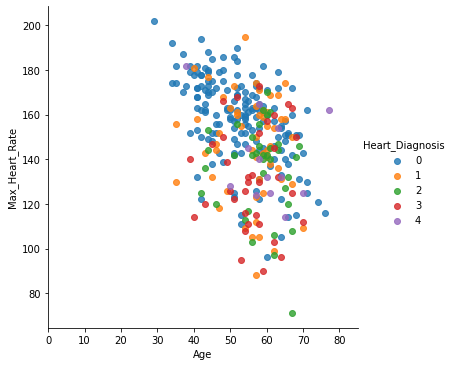

In [13]:
plt.figure(figsize=(12,7));
sns.lmplot(x="Age",y="Max_Heart_Rate", data=data,fit_reg = False,hue="Heart_Diagnosis"); 
plt.xlim(0,85);

From the above scatter graph we clearly see tht pour distribution majorly lies in the age of 55-65 for individuals identified with heart diagnosis. We can also see that the max heart rate pf people diagnosed positive has not been above 130 in most cases.

#### PRE-PROCESSING OUR DATASET:

Checking for any null values:

In [14]:
data.isnull().sum()

Age                         0
Sex                         0
Angina_(Chest_Pain)         0
Resting_BP                  0
Serum Cholesterol           0
Fasting_Sugar               0
Resting_ECG                 0
Max_Heart_Rate              0
Excercise_Induced_Angina    0
Exercise_induces_ST         0
ST_Segment                  0
Vessels                     0
Thalassemia                 0
Heart_Diagnosis             0
dtype: int64

There are no null values in our dataset. We have also got a basic idea of our data and analytics to proceed further.

### Implementing the Bayesian Model:

The columns names here are the parameters on which we are constructing our Bayesian Model. We will make connections between the different parameters to make a model.

In [ ]:
model = BayesianModel([(),(),()])

References:

1. https://www.youtube.com/watch?v=sCqpWCYaL5U&t=16s
2. https://www.bayesserver.com/docs/introduction/bayesian-networks
3.https://analyticsindiamag.com/guide-to-pgmpy-probabilistic-graphical-models-with-python-code/
4. https://pgmpy.org/
5. https://towardsdatascience.com/heart-disease-prediction-73468d630cfc